In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
# load normalized data and true labels
scaled_data = pd.read_csv('../data/scaled_data_v2.csv')
labels = pd.read_csv('../data/labels.csv')

# encode categorical labels to numerical codes
labels = labels['Response'].values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
print("Label Map:")
for encoded_value, original_label in enumerate(label_encoder.classes_):
    print(f"{encoded_value}: {original_label}")

Label Map:
0: N
1: R
2: UNK


In [4]:
# fit PCA to data
pca = PCA(n_components=15)
pca.fit_transform(scaled_data)

array([[ 89.08892569,  14.19411913,  -5.17502272, ...,   1.92403037,
          0.9529233 ,  -2.95281231],
       [ 88.77378889,  16.4062745 ,  -1.52376522, ...,   0.36693222,
         -1.77915523,  -1.10760751],
       [ 88.41453189,  18.02785746,  -6.01221961, ...,  -1.53686263,
         -1.05525725,   2.82912892],
       ...,
       [-73.37834539,  21.45272729,   3.48059886, ...,   1.37064773,
         -0.88507802,  -4.30803704],
       [-75.18879184,  19.19363538,  -0.75725598, ...,  -0.86931513,
         -0.74458574,  -0.35147487],
       [-74.56284945,  24.34330363,   5.98476321, ...,  -1.2375285 ,
          1.05040322,   0.39930769]])

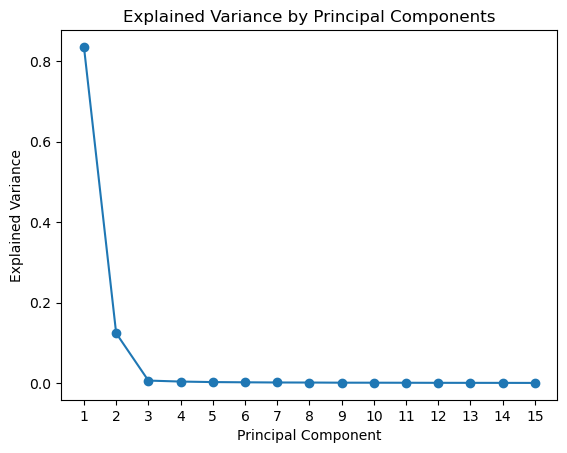

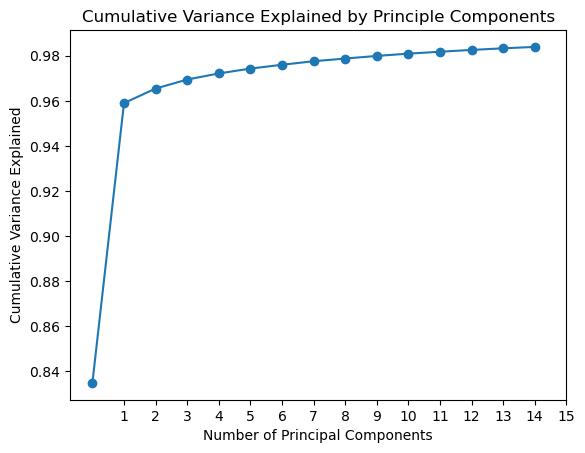

In [5]:
# use elbow method on variance explained to select optimal number of principal components
explained_variance = pca.explained_variance_ratio_

# plot explained variance against principal component
plt.plot(range(1, len(explained_variance) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1, 1))
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

# also check cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Variance Explained by Principle Components')
plt.xlabel('Number of Principal Components')
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1, 1))
plt.ylabel('Cumulative Variance Explained') ;

In [6]:
# 2 principal components seems to be optimal
pca2 = PCA(n_components=2)
PCAreduced_data = pca2.fit_transform(scaled_data)

In [7]:
# Get the loadings (coefficients) for the first two principal components
loadings = pca2.components_[:2]
# Get the absolute values of the loadings
abs_loadings = np.abs(loadings)
# Find the indices of top features for each principal component in descending order
top_features_indices = np.argsort(abs_loadings, axis=1)[:, ::-1]
# Make the column headers in scaled_data as a list
genes = list(scaled_data.columns)
print(genes)
# Get the names of features corresponding to the top indices
top_features = [genes[idx] for idx in top_features_indices.flatten()]
print(top_features)

['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '15

In [9]:
# To find the gene names of the top contributing genes of the PCA
imputed_data = pd.read_csv('../data/imputed_data.csv')
Gene532 = imputed_data.columns[533]
print('Gene532:', Gene532)
Gene247 = imputed_data.columns[248]
print('Gene247:',Gene247)

Gene532: NOTCH1
Gene247: EP300


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


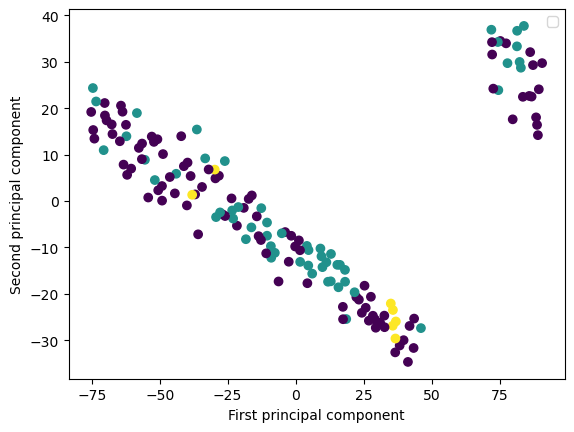

In [12]:
plt.scatter(PCAreduced_data[:, 0], PCAreduced_data[:, 1], c=labels_encoded, labels = )
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.legend()
plt.show()

In [73]:
# Train a logistic regression model using the top 2 PCAs
logreg = sklearn.linear_model.LogisticRegression()
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(PCAreduced_data)
PCAreduced_data = scaler.transform(PCAreduced_data)
logreg.fit(PCAreduced_data,labels_encoded)
y_pred = logreg.predict(PCAreduced_data)
acc = accuracy_score(labels_encoded, y_pred)
print("Accuracy score of LogReg model on top 2 PCAs:", acc)

Accuracy score of LogReg model on top 2 PCAs: 0.6114649681528662
